<a href="https://colab.research.google.com/github/annakasper1/QNC/blob/main/Binomial_Distribution_(Quantal_Release_Exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

**Exercise 1**

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

P(X=0) = 0.107374
P(X=1) = 0.268435
P(X=2) = 0.301990
P(X=3) = 0.201327
P(X=4) = 0.088080
P(X=5) = 0.026424
P(X=6) = 0.005505
P(X=7) = 0.000786
P(X=8) = 0.000074
P(X=9) = 0.000004
P(X=10) = 0.000000


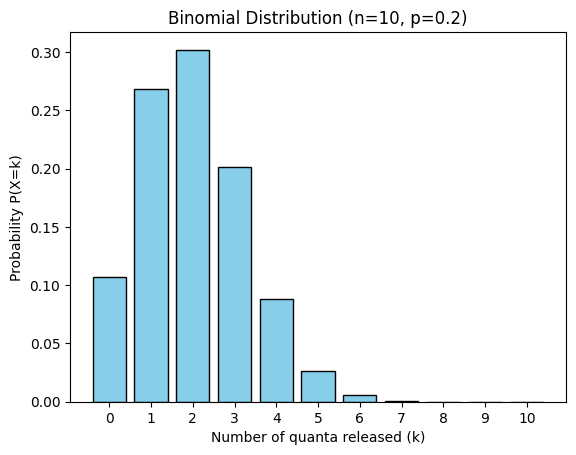

In [1]:
import math
import matplotlib.pyplot as plt

# parameters
n = 10   # number of quanta
p = 0.2  # probability of release per quantum

def binomial_pmf(n, k, p):
    """Compute Binomial probability P(X=k)"""
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# calculate probabilities for k = 0,...,10
probs = [binomial_pmf(n, k, p) for k in range(n+1)]

# print results
for k, prob in enumerate(probs):
    print(f"P(X={k}) = {prob:.6f}")

# plot the distribution
plt.bar(range(n+1), probs, color="skyblue", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability P(X=k)")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xticks(range(n+1))
plt.show()

**Exercise 2**

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

P(X=8 | p=0.1) = 1.595917e-05
P(X=8 | p=0.7) = 1.262023e-01

Likelihoods for each decile:
p=0.1 -> L(p)=1.595917e-05
p=0.2 -> L(p)=2.015279e-03
p=0.3 -> L(p)=2.318001e-02
p=0.4 -> L(p)=9.182116e-02
p=0.5 -> L(p)=1.832886e-01
p=0.6 -> L(p)=2.065976e-01
p=0.7 -> L(p)=1.262023e-01
p=0.8 -> L(p)=3.224447e-02
p=0.9 -> L(p)=1.292693e-03
p=1.0 -> L(p)=0.000000e+00

Maximum likelihood at p=0.57 with L(p)=2.115266e-01


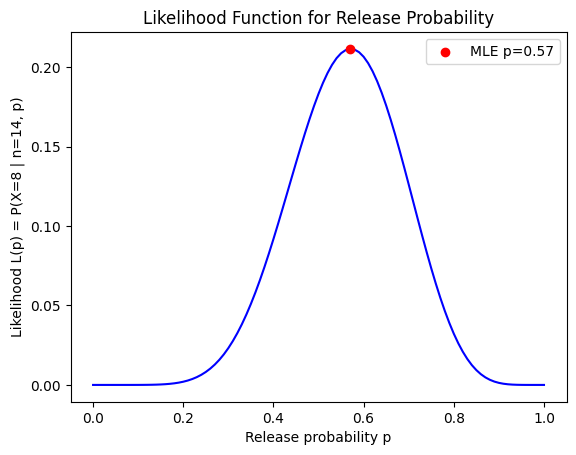

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# parameters
n = 14   # number of quanta
k = 8    # observed number of quanta released

def binomial_pmf(n, k, p):
    """Compute Binomial probability P(X=k)"""
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# 1. Probabilities for p = 0.1 and p = 0.7
p1, p2 = 0.1, 0.7
prob_p1 = binomial_pmf(n, k, p1)
prob_p2 = binomial_pmf(n, k, p2)

print(f"P(X={k} | p={p1}) = {prob_p1:.6e}")
print(f"P(X={k} | p={p2}) = {prob_p2:.6e}")

# 2. Probabilities for each decile
deciles = [round(i/10, 1) for i in range(1, 11)]
likelihoods_deciles = {p: binomial_pmf(n, k, p) for p in deciles}

print("\nLikelihoods for each decile:")
for p, likelihood in likelihoods_deciles.items():
    print(f"p={p:.1f} -> L(p)={likelihood:.6e}")

# 3. Likelihood function across many p values
p_values = np.linspace(0, 1, 101)  # 0.00 to 1.00
likelihoods = [binomial_pmf(n, k, p) for p in p_values]

# Find MLE (p that maximizes likelihood)
max_idx = int(np.argmax(likelihoods))
p_mle = p_values[max_idx]
likelihood_mle = likelihoods[max_idx]

print(f"\nMaximum likelihood at p={p_mle:.2f} with L(p)={likelihood_mle:.6e}")

# 4. Plot likelihood function
plt.plot(p_values, likelihoods, color="blue")
plt.scatter(p_mle, likelihood_mle, color="red", zorder=5, label=f"MLE p={p_mle:.2f}")
plt.xlabel("Release probability p")
plt.ylabel(f"Likelihood L(p) = P(X={k} | n={n}, p)")
plt.title("Likelihood Function for Release Probability")
plt.legend()
plt.show()


**Exercise 3**

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

Total likelihood for p=0.1: L = 1.237819e-07
Total log-likelihood for p=0.1: logL = -1.590474e+01

Likelihoods at deciles (p from 0.0 to 1.0):
p=0.0 -> L=0.000000e+00, logL=-inf
p=0.1 -> L=1.237819e-07, logL=-1.590474e+01
p=0.2 -> L=1.732843e-04, logL=-8.660577e+00
p=0.3 -> L=4.550575e-03, logL=-5.392502e+00
p=0.4 -> L=1.897003e-02, logL=-3.964895e+00
p=0.5 -> L=2.239647e-02, logL=-3.798852e+00
p=0.6 -> L=8.431125e-03, logL=-4.775825e+00
p=0.7 -> L=8.358200e-04, logL=-7.087097e+00
p=0.8 -> L=1.083027e-05, logL=-1.143317e+01
p=0.9 -> L=1.528171e-09, logL=-2.029919e+01
p=1.0 -> L=0.000000e+00, logL=-inf

High-resolution MLE (grid): p=0.4640, L=2.405609e-02, logL=-3.727367e+00
Closed-form MLE: 13/28 = 0.464286


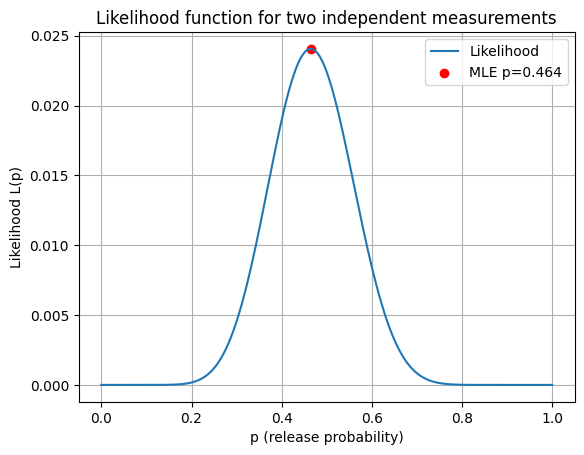

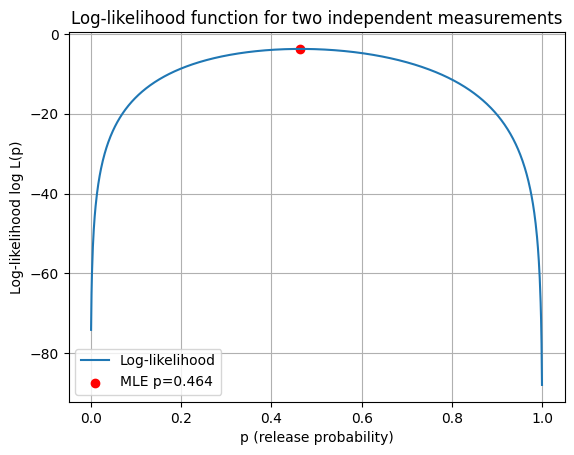

For m=2 measurements: successes=13/28, MLE ≈ 0.464000


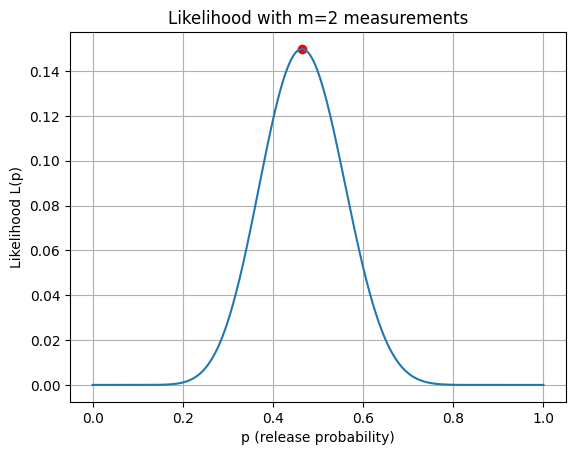

For m=5 measurements: successes=32/70, MLE ≈ 0.457000


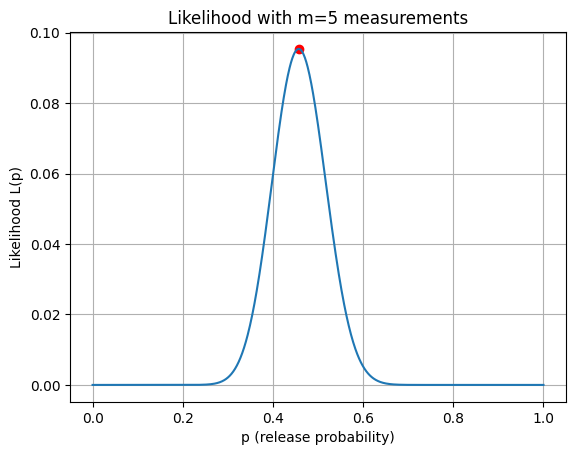

For m=10 measurements: successes=65/140, MLE ≈ 0.464000


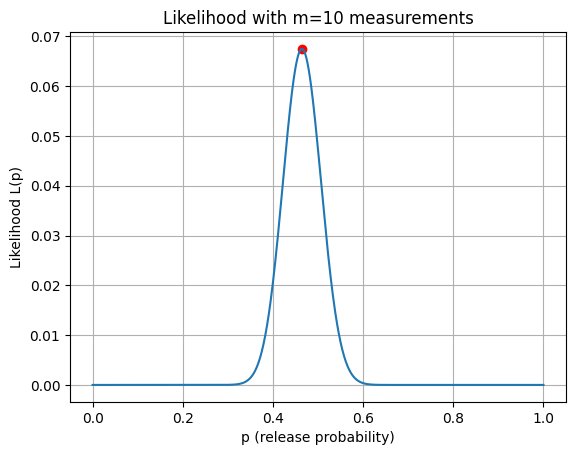

For m=50 measurements: successes=325/700, MLE ≈ 0.464000


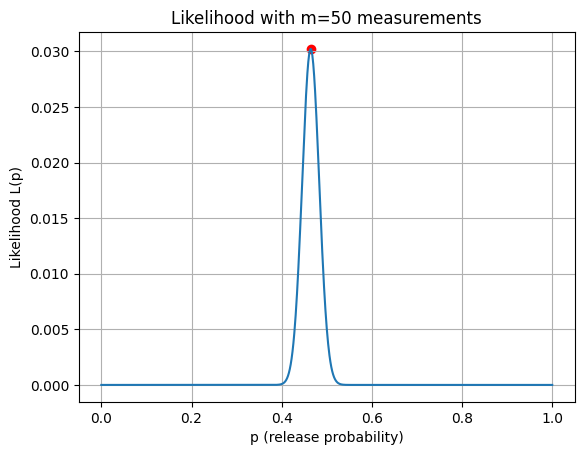

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Data: two independent experiments
n = 14
k1 = 8
k2 = 5
observations = [(k1, n), (k2, n)]

def binomial_pmf(n, k, p):
    """Binomial probability mass function P(X=k)"""
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

def total_likelihood(p, obs):
    """Compute total likelihood and log-likelihood for independent observations"""
    probs = [binomial_pmf(n_i, k_i, p) for (k_i, n_i) in obs]
    L = np.prod(probs)
    with np.errstate(divide="ignore"):
        logL = np.sum(np.log(probs))
    return L, logL

# 1) Likelihood for p=0.1
p_test = 0.1
L_p_test, logL_p_test = total_likelihood(p_test, observations)
print(f"Total likelihood for p={p_test:.1f}: L = {L_p_test:.6e}")
print(f"Total log-likelihood for p={p_test:.1f}: logL = {logL_p_test:.6e}")

# 2) Likelihoods at deciles
deciles = np.round(np.linspace(0, 1, 11), 2)
print("\nLikelihoods at deciles (p from 0.0 to 1.0):")
for p in deciles:
    L, logL = total_likelihood(p, observations)
    print(f"p={p:.1f} -> L={L:.6e}, logL={logL:.6e}")

# 3) High-resolution grid for MLE
p_values = np.linspace(0, 1, 1001)
L_values = []
logL_values = []
for p in p_values:
    L, logL = total_likelihood(p, observations)
    L_values.append(L)
    logL_values.append(logL)

L_values = np.array(L_values)
logL_values = np.array(logL_values)

max_idx = np.nanargmax(L_values)
p_mle = p_values[max_idx]
L_mle = L_values[max_idx]
logL_mle = logL_values[max_idx]

# Closed-form MLE = total successes / total trials
total_successes = k1 + k2
total_trials = n + n
p_hat_closed = total_successes / total_trials

print(f"\nHigh-resolution MLE (grid): p={p_mle:.4f}, L={L_mle:.6e}, logL={logL_mle:.6e}")
print(f"Closed-form MLE: {total_successes}/{total_trials} = {p_hat_closed:.6f}")

# 4) Plot likelihood and log-likelihood
plt.figure()
plt.plot(p_values, L_values, label="Likelihood")
plt.scatter([p_mle], [L_mle], color="red", label=f"MLE p={p_mle:.3f}")
plt.xlabel("p (release probability)")
plt.ylabel("Likelihood L(p)")
plt.title("Likelihood function for two independent measurements")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(p_values, logL_values, label="Log-likelihood")
plt.scatter([p_mle], [logL_mle], color="red", label=f"MLE p={p_mle:.3f}")
plt.xlabel("p (release probability)")
plt.ylabel("Log-likelihood log L(p)")
plt.title("Log-likelihood function for two independent measurements")
plt.legend()
plt.grid(True)
plt.show()

# 5) How the likelihood sharpens with larger sample sizes
ms = [2, 5, 10, 50]  # number of measurements
for m in ms:
    tot_trials = m * n
    tot_successes = int(round(p_hat_closed * tot_trials))
    p_vals = np.linspace(0, 1, 1001)
    Ls = [binomial_pmf(tot_trials, tot_successes, p) for p in p_vals]
    p_mle_local = p_vals[np.argmax(Ls)]
    print(f"For m={m} measurements: successes={tot_successes}/{tot_trials}, MLE ≈ {p_mle_local:.6f}")

    plt.figure()
    plt.plot(p_vals, Ls)
    plt.scatter([p_mle_local], [max(Ls)], color="red")
    plt.xlabel("p (release probability)")
    plt.ylabel("Likelihood L(p)")
    plt.title(f"Likelihood with m={m} measurements")
    plt.grid(True)
    plt.show()


**Exercise 4**:

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
Count: 0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0,

What is the most likely value of p, which we refer to as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find p-hat.

Grid search MLE (resolution 0.01): p-hat = 0.44
Fitted MLE using optimization: p-hat = 0.4359


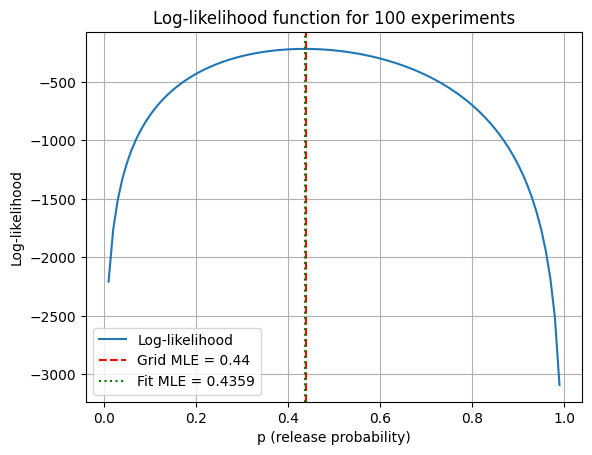

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Parameters
n = 14
counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0]  # observed counts
total_experiments = sum(counts)

def log_likelihood(p, n, counts):
    """Compute total log-likelihood for given p."""
    if p <= 0 or p >= 1:
        return -np.inf  # avoid invalid logs
    logL = 0.0
    for k, c in enumerate(counts):
        if c > 0:
            term = math.comb(n, k) * (p**k) * ((1-p)**(n-k))
            logL += c * math.log(term)
    return logL

# 1) Grid search with resolution 0.01
p_grid = np.linspace(0.01, 0.99, 99)
logL_values = [log_likelihood(p, n, counts) for p in p_grid]
p_hat_grid = p_grid[np.argmax(logL_values)]
print(f"Grid search MLE (resolution 0.01): p-hat = {p_hat_grid:.2f}")

# 2) BONUS: refine with numerical optimization
res = minimize_scalar(lambda p: -log_likelihood(p, n, counts), bounds=(0,1), method="bounded")
p_hat_fit = res.x
print(f"Fitted MLE using optimization: p-hat = {p_hat_fit:.4f}")

# 3) Plot the log-likelihood function
plt.plot(p_grid, logL_values, label="Log-likelihood")
plt.axvline(p_hat_grid, color="red", linestyle="--", label=f"Grid MLE = {p_hat_grid:.2f}")
plt.axvline(p_hat_fit, color="green", linestyle=":", label=f"Fit MLE = {p_hat_fit:.4f}")
plt.xlabel("p (release probability)")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood function for 100 experiments")
plt.legend()
plt.grid(True)
plt.show()


**Exercise 5**
Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute
. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 14
k_obs = 7
p_null = 0.3

def binom_pmf(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# Probability of observing exactly k_obs under null
p_exact = binom_pmf(n, k_obs, p_null)

# One-sided p-values
p_ge = sum(binom_pmf(n, k, p_null) for k in range(k_obs, n+1))
p_le = sum(binom_pmf(n, k, p_null) for k in range(0, k_obs+1))

# Two-sided p-value (exact): sum probabilities of outcomes with pmf <= pmf_obs
pmf_values = [binom_pmf(n, k, p_null) for k in range(n+1)]
# small tolerance to include equal floating errors
threshold = p_exact + 1e-16
p_two_sided = sum(p for p in pmf_values if p <= threshold)

# Two-sided p-value (doubled smaller tail)
p_two_sided_doubled = min(1.0, 2 * min(p_le, p_ge))

# Print results
print(f"Observed k = {k_obs} out of n = {n}, null p = {p_null:.2f}\n")
print(f"P(X = {k_obs} | p = {p_null}) = {p_exact:.6e}")
print(f"One-sided p-value P(X >= {k_obs}) = {p_ge:.6e}")
print(f"One-sided p-value P(X <= {k_obs}) = {p_le:.6e}")
print(f"Two-sided p-value (sum pmf <= pmf_obs) = {p_two_sided:.6e}")
print(f"Two-sided p-value (2 * smaller tail) = {p_two_sided_doubled:.6e}")

# Plot PMF wi


Observed k = 7 out of n = 14, null p = 0.30

P(X = 7 | p = 0.3) = 6.181336e-02
One-sided p-value P(X >= 7) = 9.328189e-02
One-sided p-value P(X <= 7) = 9.685315e-01
Two-sided p-value (sum pmf <= pmf_obs) = 1.407575e-01
Two-sided p-value (2 * smaller tail) = 1.865638e-01
